In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

url = "bestsellers with categories.csv"
df = pd.read_csv(url)

# Виведіть перші п'ять рядків
print(df.head())


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [5]:
# Виведіть розміри датасету
print(f"Розмір датасету: {df.shape}")
print(f"Відповідь: Про скільки книг зберігає дані датасет? Про {df.shape[0]} книг.")

Розмір датасету: (550, 7)
Відповідь: Про скільки книг зберігає дані датасет? Про 550 книг.


In [6]:
# Зміна назв колонок (snake_style)
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [7]:
# Перевірте кількість пропусків
print("--- Кількість пропусків ---")
na_counts = df.isna().sum()
print(na_counts)
# Перевіряємо, чи є хоч один пропуск
has_na = na_counts.sum() > 0
print(f"Відповідь: Чи є в якихось змінних пропуски? {'Так' if has_na else 'Ні'}")

--- Кількість пропусків ---
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Відповідь: Чи є в якихось змінних пропуски? Ні


In [8]:
# Унікальні значення в колонці genre
unique_genres = df['genre'].unique()
print(f"Відповідь: Які є унікальні жанри? {unique_genres}")

Відповідь: Які є унікальні жанри? ['Non Fiction' 'Fiction']


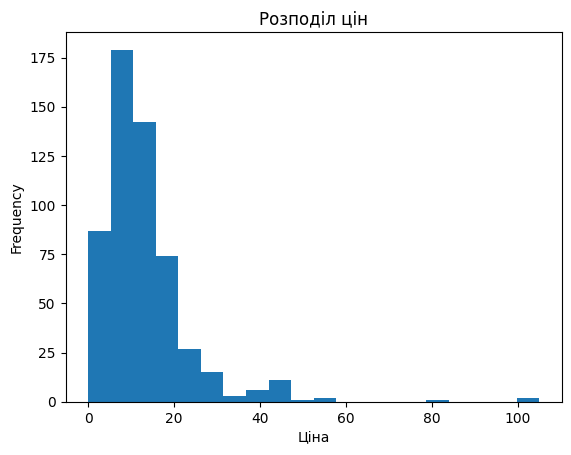

In [9]:
# Розподіл цін (гістограма)
df['price'].plot(kind='hist', title='Розподіл цін', bins=20)
plt.xlabel('Ціна')
plt.show()

In [10]:
# Статистика цін
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Відповідь: Максимальна ціна? {max_price}")
print(f"Відповідь: Мінімальна ціна? {min_price}")
print(f"Відповідь: Середня ціна? {mean_price:.2f}")
print(f"Відповідь: Медіанна ціна? {median_price}")

Відповідь: Максимальна ціна? 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? 13.10
Відповідь: Медіанна ціна? 11.0


In [11]:
# Найвищий рейтинг
max_rating = df['user_rating'].max()
print(f"Відповідь: Який рейтинг у датасеті найвищий? {max_rating}")

Відповідь: Який рейтинг у датасеті найвищий? 4.9


In [12]:
# Скільки книг мають такий рейтинг
count_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Відповідь: Скільки книг мають такий рейтинг? {count_max_rating}")

Відповідь: Скільки книг мають такий рейтинг? 52


In [13]:
# Яка книга має найбільше відгуків
max_reviews_idx = df['reviews'].idxmax()
book_most_reviews = df.loc[max_reviews_idx, 'name']
print(f"Відповідь: Яка книга має найбільше відгуків? {book_most_reviews}")

Відповідь: Яка книга має найбільше відгуків? Where the Crawdads Sing


In [14]:
# Найдорожча книга 2015 року
top_2015 = df[df['year'] == 2015]
most_expensive_2015 = top_2015.sort_values('price', ascending=False).iloc[0]
print(f"Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? {most_expensive_2015['name']} (Ціна: {most_expensive_2015['price']})")

Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Publication Manual of the American Psychological Association, 6th Edition (Ціна: 46)


In [15]:
# Скільки книг жанру Fiction у 2010 році
fiction_2010_count = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? {fiction_2010_count}")

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? 20


In [16]:
# Рейтинг 4.9 у 2010 та 2011 роках
rating_49_10_11 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(f"Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? {rating_49_10_11}")

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? 1


In [17]:
# Сортування (2015 рік, ціна < 8, сортування за ціною)
sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
last_book = sorted_books.iloc[-1]['name']
print(f"Відповідь: Яка книга остання у відсортованому списку? {last_book}")

Відповідь: Яка книга остання у відсортованому списку? Old School (Diary of a Wimpy Kid #10)


In [19]:
# Максимальна та мінімальна ціна для жанрів
genre_prices = df.groupby('genre')['price'].agg(['min', 'max'])
print("--- Ціни за жанрами ---")
print(genre_prices)
print(f"Відповідь: Максимальна ціна для жанру Fiction: {genre_prices.loc['Fiction', 'max']}")
print(f"Відповідь: Мінімальна ціна для жанру Fiction: {genre_prices.loc['Fiction', 'min']}")
print(f"Відповідь: Максимальна ціна для жанру Non Fiction: {genre_prices.loc['Non Fiction', 'max']}")
print(f"Відповідь: Мінімальна ціна для жанру Non Fiction: {genre_prices.loc['Non Fiction', 'min']}")


--- Ціни за жанрами ---
             min  max
genre                
Fiction        0   82
Non Fiction    0  105
Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction: 0
Відповідь: Максимальна ціна для жанру Non Fiction: 105
Відповідь: Мінімальна ціна для жанру Non Fiction: 0


In [20]:
# Кількість книг для кожного автора
authors_count = df.groupby('author')['name'].agg('count').to_frame(name='books_count')
print(f"Відповідь: Якої розмірності вийшла таблиця? {authors_count.shape}")

most_books_author = authors_count['books_count'].idxmax()
most_books_count = authors_count['books_count'].max()
print(f"Відповідь: Який автор має найбільше книг? {most_books_author}")
print(f"Відповідь: Скільки книг цього автора? {most_books_count}")


Відповідь: Якої розмірності вийшла таблиця? (248, 1)
Відповідь: Який автор має найбільше книг? Jeff Kinney
Відповідь: Скільки книг цього автора? 12


In [21]:
# Середній рейтинг для кожного автора
authors_rating = df.groupby('author')['user_rating'].agg('mean').to_frame(name='avg_rating')
min_rating_author = authors_rating['avg_rating'].idxmin()
min_rating_val = authors_rating['avg_rating'].min()
print(f"Відповідь: У якого автора середній рейтинг мінімальний? {min_rating_author}")
print(f"Відповідь: Який у цього автора середній рейтинг? {min_rating_val}")


Відповідь: У якого автора середній рейтинг мінімальний? Donna Tartt
Відповідь: Який у цього автора середній рейтинг? 3.9


In [22]:
# З'єднання таблиць (concat)
authors_combined = pd.concat([authors_count, authors_rating], axis=1)

# Сортування (кількість книг зростає, рейтинг зростає)
authors_sorted = authors_combined.sort_values(by=['books_count', 'avg_rating'])

print("--- Перші рядки відсортованої таблиці ---")
print(authors_sorted.head())
print(f"Відповідь: Який автор перший у списку? {authors_sorted.index[0]}")

--- Перші рядки відсортованої таблиці ---
                   books_count  avg_rating
author                                    
Muriel Barbery               1         4.0
Chris Cleave                 1         4.1
Ian K. Smith M.D.            1         4.1
Pierre Dukan                 1         4.1
Elizabeth Strout             1         4.2
Відповідь: Який автор перший у списку? Muriel Barbery


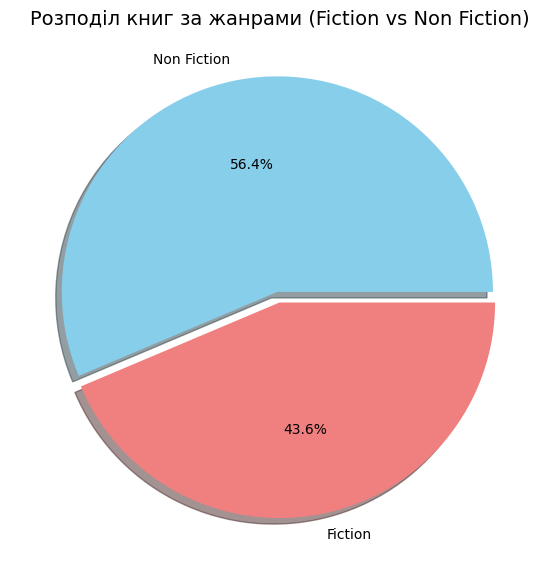

In [23]:
# Графік 1: Кількість книг за жанрами
plt.figure(figsize=(7, 7))
genre_counts = df['genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=(0.05, 0), shadow=True)
plt.title('Розподіл книг за жанрами (Fiction vs Non Fiction)', fontsize=14)
plt.show()

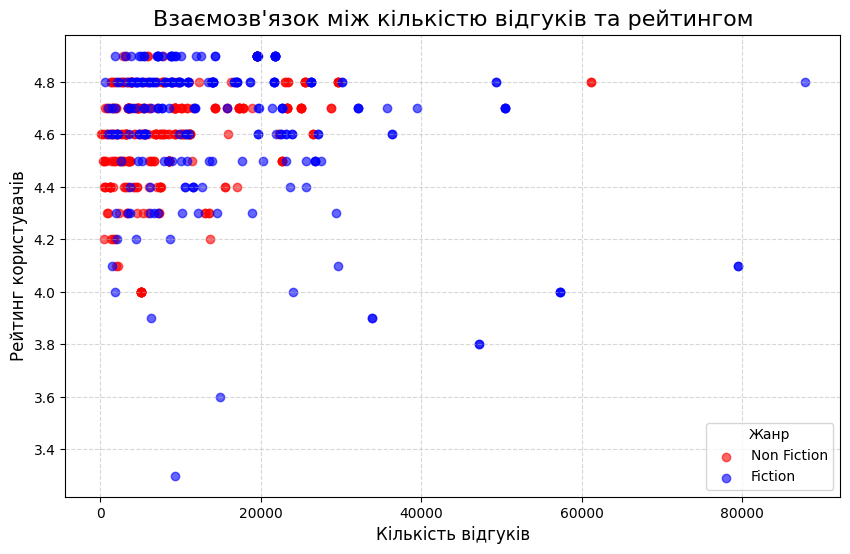

In [24]:
# Графік 2: Залежність рейтингу від відгуків
plt.figure(figsize=(10, 6))

colors = {'Fiction': 'blue', 'Non Fiction': 'red'}

for genre in df['genre'].unique():
    subset = df[df['genre'] == genre]
    
    plt.scatter(subset['reviews'], subset['user_rating'], c=colors[genre], label=genre, alpha=0.6)

plt.title('Взаємозв\'язок між кількістю відгуків та рейтингом', fontsize=16)
plt.xlabel('Кількість відгуків', fontsize=12)
plt.ylabel('Рейтинг користувачів', fontsize=12)
plt.legend(title='Жанр') 
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

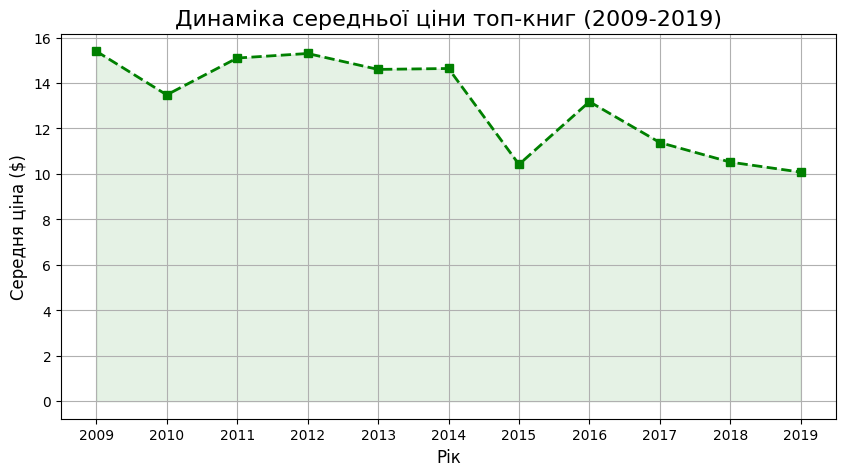

In [25]:
# Графік 3: Зміна середньої ціни книг по роках
plt.figure(figsize=(10, 5))
avg_price_by_year = df.groupby('year')['price'].mean()

plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='s', linestyle='--', color='green', linewidth=2)
plt.fill_between(avg_price_by_year.index, avg_price_by_year.values, color='green', alpha=0.1)
plt.title('Динаміка середньої ціни топ-книг (2009-2019)', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Середня ціна ($)', fontsize=12)
plt.xticks(avg_price_by_year.index)
plt.grid(True)
plt.show()